<a href="https://colab.research.google.com/github/rampselv/dataanalytics/blob/master/Ex_7_PCA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
data = pd.read_csv('iris.csv')
list(data.columns)

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

In [0]:
import numpy as np
mean_sepallen = np.average(data['sepal.length'])
mean_sepalwidth = np.average(data['sepal.width'])
mean_petallen = np.average(data['petal.length'])
mean_petalwidth = np.average(data['petal.width'])

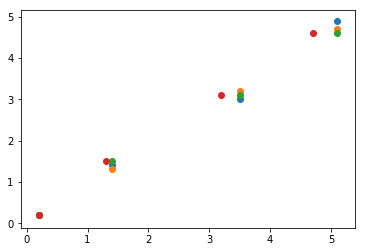

In [0]:
org_data = data.iloc[:,0:4].values
#sepal length and width
plt.scatter(org_data[0],org_data[1])
#sepal length and petal length
plt.scatter(org_data[0],org_data[2])
#sepal length and petal width
plt.scatter(org_data[0],org_data[3])
#petal length and petal width
plt.scatter(org_data[2],org_data[3])

In [0]:
org_data = data.iloc[:,0:4].values
mean_subtracted = np.mean(org_data,axis=0)
mean_sub_value = org_data-mean_subtracted
cov_mat = (org_data - mean_subtracted).T.dot((org_data - mean_subtracted))/(org_data.shape[0]-1)
cov_mat

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [0]:
value,vector = np.linalg.eig(cov_mat)
print("Eigen value:",value)
print("Eigen vector:",vector)

Eigen value: [4.22824171 0.24267075 0.0782095  0.02383509]
Eigen vector: [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [0]:
eigen_value = value[0:2]
eigen_vector = vector[:,0:2]
print(eigen_value)
eigen_vector


array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

In [0]:
projected_values = np.dot(mean_sub_value,eigen_vector)
projected_values

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045],
       [-2.82053775,  0.08946138],
       [-2.62614497, -0.16338496],
       [-2.88638273,  0.57831175],
       [-2.6727558 ,  0.11377425],
       [-2.50694709, -0.6450689 ],
       [-2.61275523, -0.01472994],
       [-2.78610927,  0.235112  ],
       [-3.22380374,  0.51139459],
       [-2.64475039, -1.17876464],
       [-2.38603903, -1.33806233],
       [-2.62352788, -0.81067951],
       [-2.64829671, -0.31184914],
       [-2.19982032, -0.87283904],
       [-2.5879864 , -0.51356031],
       [-2.31025622, -0.39134594],
       [-2.54370523, -0.43299606],
       [-3.21593942, -0.13346807],
       [-2.30273318, -0.09870885],
       [-2.35575405,  0.03728186],
       [-2.50666891,  0.14601688],
       [-2.46882007, -0.13095149],
       [-2.56231991, -0.36771886],
       [-2.63953472,

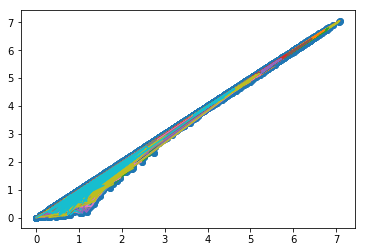

In [0]:
#shepherds plot
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
dist_x = euclidean_distances(mean_sub_value,mean_sub_value)
dist_y = euclidean_distances(projected_values,projected_values)
plt.scatter(dist_x,dist_y)
plt.plot(dist_x,dist_y)

In [0]:
#projection error (1-(1/n))*eigen_values(i)
#where i is between q+1 to p
error_len = (1-(1/len(data.index)))
sum_eigen_val=value[2]+value[3]
error = error_len*sum_eigen_val
error

0.10136429572959268